<a href="https://colab.research.google.com/github/DuarteMagano/Hello-Quantum-World/blob/main/tutorial_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
%pip install qiskit==1.3.2 pylatexenc
%pip install qiskit-ibm-runtime==0.35.0
# this notebook was tested for qiskit version 1.3.2 and qiskit-ibm-runtime version 0.35.0
# be careful when running newer versions

# Quantum states

In [2]:
import numpy as np

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [3]:
u = Statevector([1 / np.sqrt(2), 1 / np.sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

In [4]:
u.draw("latex")

<IPython.core.display.Latex object>

In [13]:
v.draw()

'Statevector([ 0.33333333+0.66666667j, -0.66666667+0.j        ],\n            dims=(2,))'

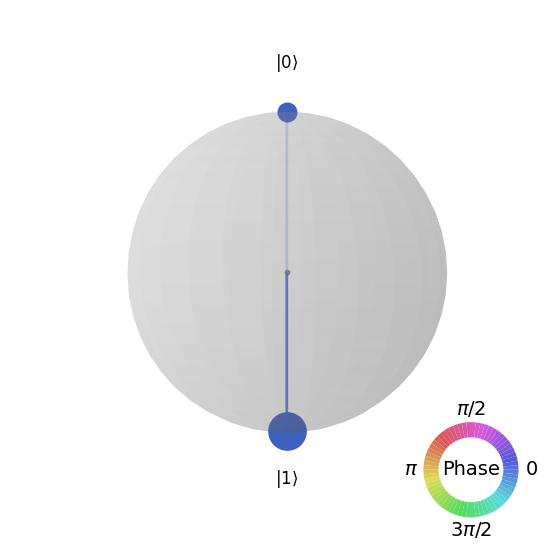

In [17]:
w.draw("qsphere")

In [7]:
# check is the states are l2-normalized

for state in (u, v, w):
  display(state.draw("latex"))
  print(f"is valid? {state.is_valid()}")

<IPython.core.display.Latex object>

is valid? True


<IPython.core.display.Latex object>

is valid? True


<IPython.core.display.Latex object>

is valid? False


In [8]:
outcome, state = u.measure()
print(f"{outcome = }")
print("Pre-measurement state:"); display(u.draw("latex")) # u is not modified by measurement
print("Post-measurement state:"); display(state.draw("latex"))

outcome = '0'
Pre-measurement state:


<IPython.core.display.Latex object>

Post-measurement state:


<IPython.core.display.Latex object>

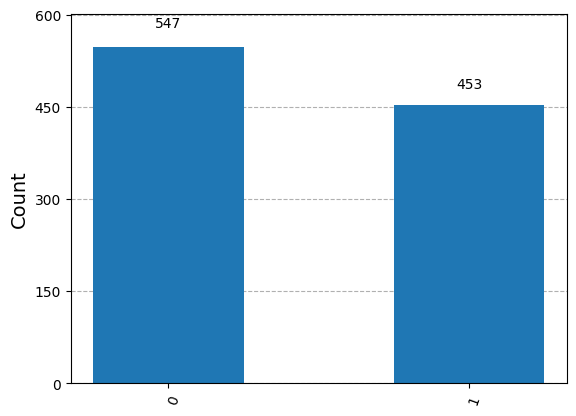

In [9]:
statistics = v.sample_counts(1000)
plot_histogram(statistics)

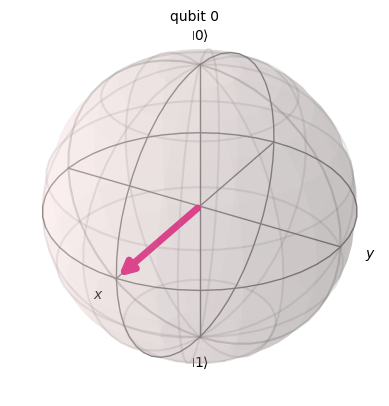

In [10]:
plot_bloch_multivector(u)

In [11]:
# creating states from label can be useful

state = Statevector.from_label('0')
state.draw("latex")

<IPython.core.display.Latex object>

In [12]:
state = Statevector.from_label('1')
state.draw("latex")

<IPython.core.display.Latex object>

# Quantum operations

In [18]:
from qiskit.quantum_info import Operator

In [20]:
# create operator from explicit matrix representation

U = Operator(np.array([[0., 1.],
                       [1., 0.]]))

In [21]:
U.draw("latex")

<IPython.core.display.Latex object>

In [22]:
U.num_qubits

1

In [26]:
U.is_unitary()

True

In [27]:
U2 = Operator(np.array([[2., 2.],
                        [1., 0.]]))

U2.draw("latex")

<IPython.core.display.Latex object>

In [28]:
U2.is_unitary()

False

In [29]:
# we can create operators from a fixed set of labels

X = Operator.from_label("X")
X.draw("latex")

<IPython.core.display.Latex object>

In [30]:
for label in ("X", "Y", "Z", "S", "T", "H"):
  op = Operator.from_label(label)
  print(label + ":"); display(op.draw("latex"))

X:


<IPython.core.display.Latex object>

Y:


<IPython.core.display.Latex object>

Z:


<IPython.core.display.Latex object>

S:


<IPython.core.display.Latex object>

T:


<IPython.core.display.Latex object>

H:


<IPython.core.display.Latex object>

In [33]:
# there are also predefined operators

from qiskit.circuit.library import RXGate

op = Operator(RXGate(np.pi/4))
op.draw("latex")

<IPython.core.display.Latex object>

# Quantum circuits

In [34]:
from qiskit import QuantumCircuit

In [35]:
# circuit with one qubit

qc = QuantumCircuit(1)

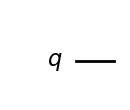

In [39]:
qc.draw('mpl') # mpl ensures pretty drawings

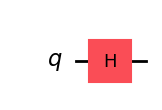

In [40]:
qc.h(0) # add H gate to circuit

qc.draw('mpl')

In [43]:
# calculate state at end of circuit

state = Statevector(qc)

state.draw("latex")

<IPython.core.display.Latex object>

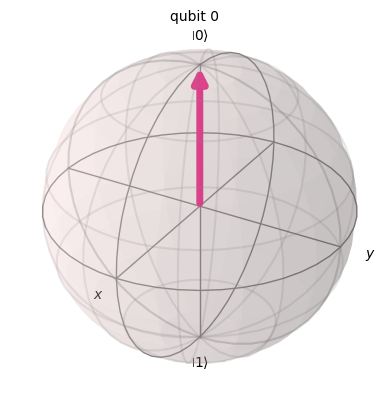

In [46]:
qc = QuantumCircuit(1)

state = Statevector(qc)
plot_bloch_multivector(state)

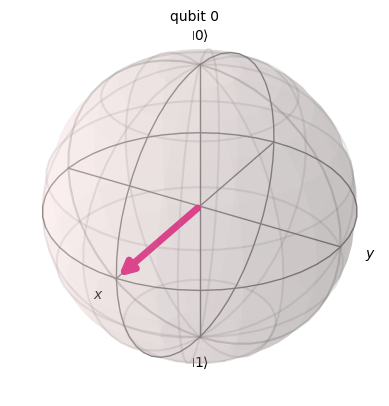

In [47]:
qc.h(0)

state = Statevector(qc)
plot_bloch_multivector(state)

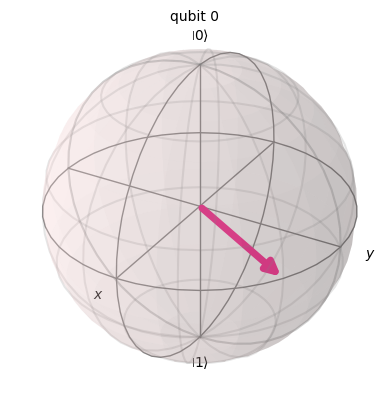

In [48]:
phi = np.pi / 3
qc.rz(phi, 0)

state = Statevector(qc)
plot_bloch_multivector(state)

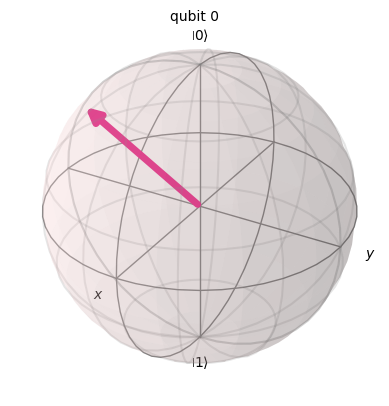

In [49]:
qc.h(0)

state = Statevector(qc)
plot_bloch_multivector(state)

In [50]:
from qiskit.circuit.library import standard_gates

print([gate for gate in dir(standard_gates) if not gate.startswith('_')])

['C3SXGate', 'C3XGate', 'C4XGate', 'CCXGate', 'CCZGate', 'CHGate', 'CPhaseGate', 'CRXGate', 'CRYGate', 'CRZGate', 'CSGate', 'CSXGate', 'CSdgGate', 'CSwapGate', 'CU1Gate', 'CU3Gate', 'CUGate', 'CXGate', 'CYGate', 'CZGate', 'DCXGate', 'ECRGate', 'GlobalPhaseGate', 'HGate', 'IGate', 'MCPhaseGate', 'MCU1Gate', 'MCXGate', 'MCXGrayCode', 'MCXRecursive', 'MCXVChain', 'PhaseGate', 'RC3XGate', 'RCCXGate', 'RGate', 'RXGate', 'RXXGate', 'RYGate', 'RYYGate', 'RZGate', 'RZXGate', 'RZZGate', 'SGate', 'SXGate', 'SXdgGate', 'SdgGate', 'SwapGate', 'TGate', 'TdgGate', 'U1Gate', 'U2Gate', 'U3Gate', 'UGate', 'XGate', 'XXMinusYYGate', 'XXPlusYYGate', 'YGate', 'ZGate', 'dcx', 'ecr', 'equivalence_library', 'get_standard_gate_name_mapping', 'global_phase', 'h', 'i', 'iSwapGate', 'iswap', 'mcrx', 'mcry', 'mcrz', 'multi_control_rotation_gates', 'p', 'r', 'rx', 'rxx', 'ry', 'ryy', 'rz', 'rzx', 'rzz', 's', 'swap', 'sx', 't', 'u', 'u1', 'u2', 'u3', 'x', 'xx_minus_yy', 'xx_plus_yy', 'y', 'z']


# Sampler primitive

In [51]:
from qiskit.primitives import StatevectorSampler
from qiskit import QuantumRegister, ClassicalRegister

In [82]:
creg = ClassicalRegister(1, 'c')
qreg = QuantumRegister(1, 'q')

qc = QuantumCircuit(qreg, creg)

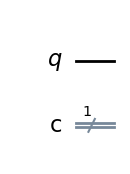

In [83]:
qc.draw('mpl')

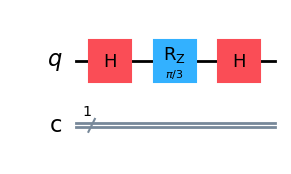

In [84]:
qc.h(qreg)
qc.rz(np.pi / 3, qreg)
qc.h(qreg)

qc.draw('mpl')

In [85]:
state = Statevector(qc)
state.draw("latex")

<IPython.core.display.Latex object>

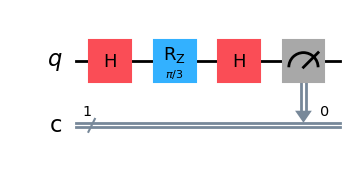

In [86]:
qc.measure(qreg, creg)
qc.draw("mpl")

In [87]:
 # the following line gives an error
 # state = Statevector(qc)
 # we need to qc.remove_final_measurements() before using Statevector

In [88]:
sampler = StatevectorSampler()
NSHOTS = 1000

In [89]:
job = sampler.run([qc], shots=NSHOTS)

In [90]:
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts = results.data.c.get_counts() # the "c" attribute is named after the classical register

In [92]:
print(f"{counts = }")

counts = {'0': 739, '1': 261}


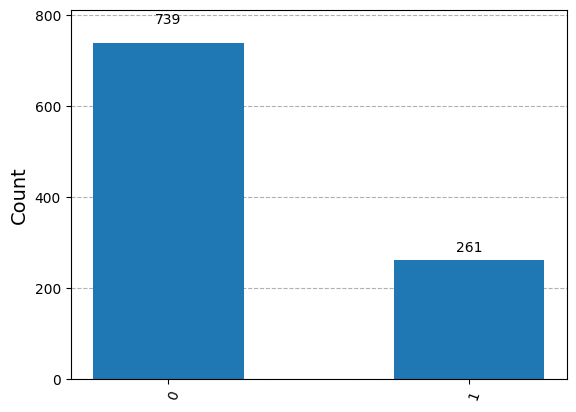

In [93]:
plot_histogram(counts)

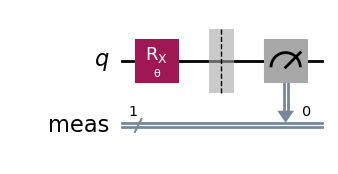

In [94]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

qc = QuantumCircuit(1)
qc.rx(theta, 0)
qc.measure_all()

qc.draw("mpl")

In [98]:
# we can feed a sampler a list of values for the free parameter

values = np.linspace(0, 2*np.pi, 50)
job = sampler.run([(qc, values)], shots = NSHOTS)

In [112]:
results = job.result()[0]
global_counts = [count.get_counts() for count in results.data.meas]

global_counts

[{'0': 1000},
 {'0': 992, '1': 8},
 {'0': 991, '1': 9},
 {'0': 970, '1': 30},
 {'0': 928, '1': 72},
 {'0': 893, '1': 107},
 {'0': 858, '1': 142},
 {'0': 801, '1': 199},
 {'0': 755, '1': 245},
 {'0': 702, '1': 298},
 {'0': 648, '1': 352},
 {'0': 601, '1': 399},
 {'1': 491, '0': 509},
 {'1': 535, '0': 465},
 {'0': 396, '1': 604},
 {'0': 328, '1': 672},
 {'1': 742, '0': 258},
 {'0': 226, '1': 774},
 {'1': 843, '0': 157},
 {'1': 879, '0': 121},
 {'1': 937, '0': 63},
 {'1': 967, '0': 33},
 {'1': 977, '0': 23},
 {'1': 989, '0': 11},
 {'1': 999, '0': 1},
 {'1': 999, '0': 1},
 {'1': 991, '0': 9},
 {'1': 979, '0': 21},
 {'1': 940, '0': 60},
 {'1': 935, '0': 65},
 {'0': 114, '1': 886},
 {'1': 837, '0': 163},
 {'1': 804, '0': 196},
 {'1': 735, '0': 265},
 {'0': 330, '1': 670},
 {'1': 599, '0': 401},
 {'1': 533, '0': 467},
 {'1': 457, '0': 543},
 {'1': 391, '0': 609},
 {'1': 371, '0': 629},
 {'0': 700, '1': 300},
 {'1': 234, '0': 766},
 {'0': 820, '1': 180},
 {'0': 873, '1': 127},
 {'0': 888, '1':

Text(0, 0.5, 'P[$0$]')

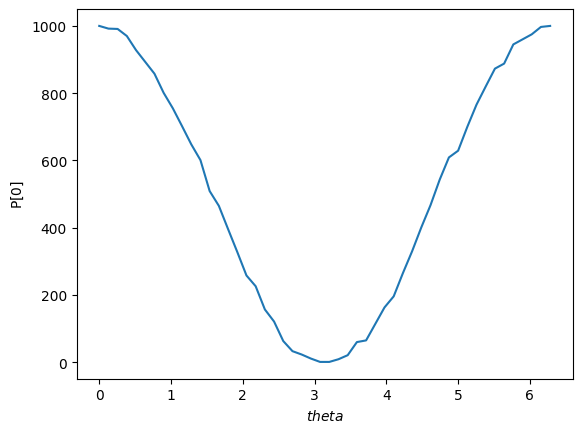

In [115]:
import matplotlib.pyplot as plt


plt.plot(values, [counts['0'] for counts in global_counts])
plt.xlabel(r"$theta$")
plt.ylabel(r"P[$0$]")

# Multiple qubits

In [116]:
state = Statevector.from_label('00')
state.draw("latex")

<IPython.core.display.Latex object>

In [117]:
state = Statevector.from_int(1, dims=2**2)
state.draw("latex")

<IPython.core.display.Latex object>

In [118]:
state = Statevector([1 / 2, 0, 0, 1 / 2])
state.draw("latex")

<IPython.core.display.Latex object>

In [119]:
XX = Operator.from_label("XX")

XX.draw("latex")

<IPython.core.display.Latex object>

In [121]:
XX.num_qubits

2

In [122]:
from qiskit.circuit.library import CXGate

op = Operator(CXGate())
op.draw("latex")

<IPython.core.display.Latex object>

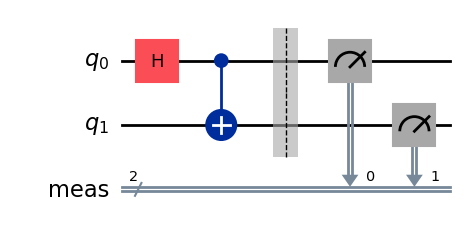

In [123]:
qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw('mpl')

In [124]:
sampler = StatevectorSampler()
NSHOTS = 1000
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0] # the "0" index is because you can run more than one circuit
counts = results.data.meas.get_counts() # "meas" is the default name for the classical register

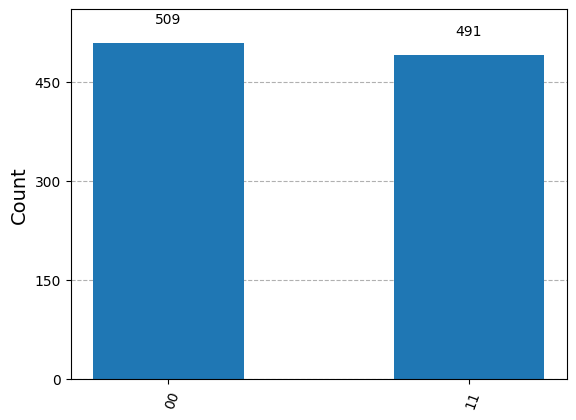

In [125]:
plot_histogram(counts)

# Qiskit runtime

In [126]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from google.colab import userdata

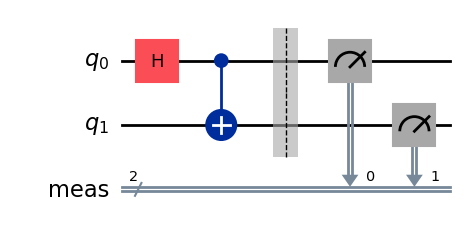

In [127]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw('mpl')

In [128]:
TOKEN = userdata.get('TOKEN')
service = QiskitRuntimeService(channel="ibm_quantum", token=TOKEN)

In [129]:
backend = service.least_busy(operational=True, simulator=False)
print(f"{backend.name =}, {backend.num_qubits = }")

backend.name ='ibm_brisbane', backend.num_qubits = 127


In [130]:
pass_manager = generate_preset_pass_manager(
    backend=backend,
    optimization_level=1
)

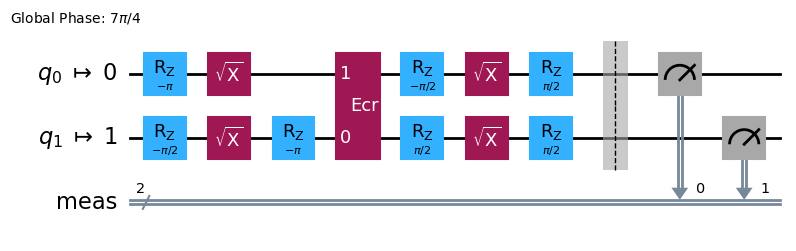

In [131]:
# Transpile circuit
isa_qc = pass_manager.run(qc)
isa_qc.draw('mpl', idle_wires=False)

In [132]:
sampler = SamplerV2(backend)

In [133]:
job = sampler.run([isa_qc], shots=128)
job.job_id()

'cz80c6rb7tt0008ftpg0'

In [134]:
job.status()

'QUEUED'

In [135]:
results = job.result()[0]
counts = results.data.meas.get_counts()

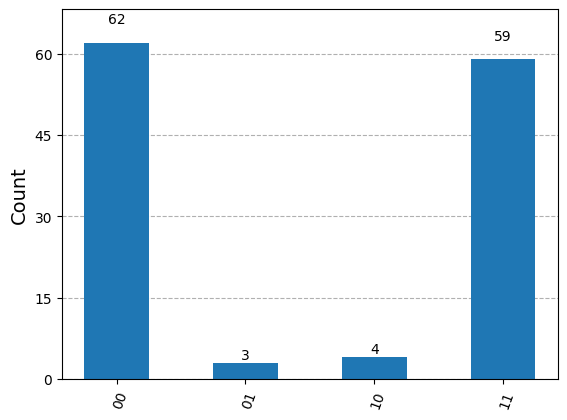

In [136]:
plot_histogram(counts)

# Quantum machine learning

In [296]:
from scipy.optimize import minimize # SciPy minimizer routine

### Case 1

In [297]:
def true_model(x):
  true_phase = 0.723
  return np.cos(x + true_phase)

In [298]:
x_train = np.linspace(0, 2*np.pi, 25) + 0.1 * np.random.rand(25)
y_train = [true_model(x) for x in x_train]

Text(0, 0.5, '$y(x)$')

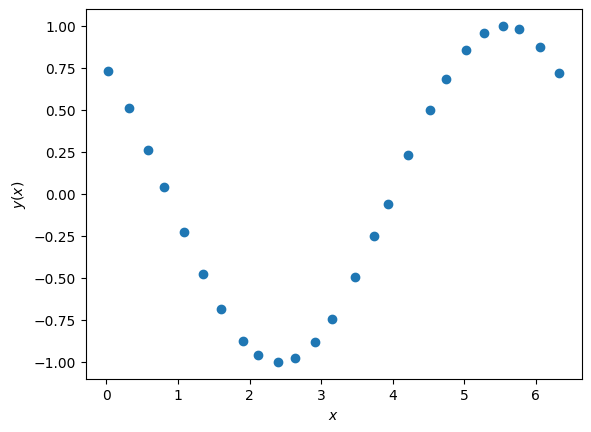

In [299]:
plt.scatter(x_train, y_train)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")

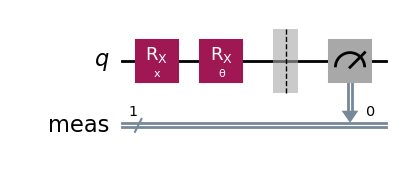

In [300]:
x = Parameter('x')
theta = Parameter('θ')

ansatz = QuantumCircuit(1)
ansatz.rx(x, 0)
ansatz.rx(theta, 0)
ansatz.measure_all()

ansatz.draw("mpl")

In [301]:
sampler = StatevectorSampler()
NSHOTS = 1024

theta = 2*np.pi * np.random.rand()
x = 1.5
parameter_values = [x, theta]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)

results = job.result()[0]
counts = results.data.meas.get_counts()

counts

{'1': 1000, '0': 24}

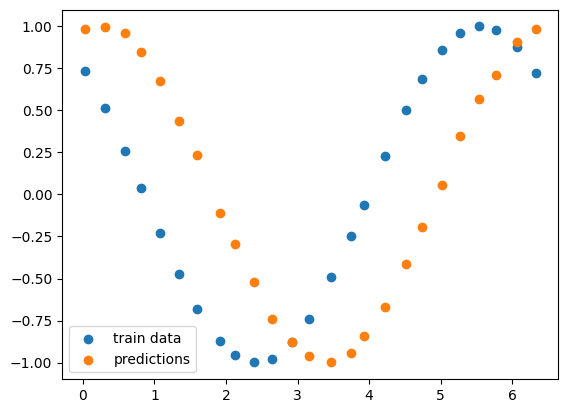

In [302]:
theta = 2*np.pi * np.random.rand()
parameter_values = [[x, theta] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

def predictor(counts):
  return (counts.get('0', 0) - counts.get('1', 0))  / (counts.get('0', 0) + counts.get('1', 0))

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

In [303]:
cost_history = {
    "prev_value": None,
    "iters": 0,
    "cost": [],
}


def cost_func(params, ansatz):

    circuit_params = np.array([[x, params[0]] for x in x_train]) # params is an array with a single value for theta
    job = sampler.run([(ansatz, circuit_params)], shots = NSHOTS)
    global_counts = [data.get_counts() for data in job.result()[0].data.meas]
    y_pred = np.array([predictor(counts) for counts in global_counts])

    cost = np.mean((y_train - y_pred)**2)

    cost_history["iters"] += 1
    cost_history["prev_vector"] = params
    cost_history["cost"].append(cost)
    print(f"Iters. done: {cost_history['iters']} [Current cost: {cost}]")

    return cost

In [304]:
params_init = 2 * np.pi * np.random.random(1)

res = minimize(
      cost_func,
      params_init,
      args=(ansatz),
      method="cobyla",
      options = {"maxiter" : 300}
  )

Iters. done: 1 [Current cost: 1.8085175599143728]
Iters. done: 2 [Current cost: 0.9512010829053001]
Iters. done: 3 [Current cost: 0.14544306492265663]
Iters. done: 4 [Current cost: 0.09657682943590157]
Iters. done: 5 [Current cost: 0.40634074099724266]
Iters. done: 6 [Current cost: 0.01923889478164547]
Iters. done: 7 [Current cost: 0.0024767330391535286]
Iters. done: 8 [Current cost: 0.048947127801787636]
Iters. done: 9 [Current cost: 0.0174044600589444]
Iters. done: 10 [Current cost: 0.00045651188407081286]
Iters. done: 11 [Current cost: 0.0030915834142956483]
Iters. done: 12 [Current cost: 0.0012146140193123984]
Iters. done: 13 [Current cost: 0.0005486982755535317]
Iters. done: 14 [Current cost: 0.00026662818771482717]
Iters. done: 15 [Current cost: 0.0003504292998508753]
Iters. done: 16 [Current cost: 0.0005778157594648769]
Iters. done: 17 [Current cost: 0.0003105174696151962]
Iters. done: 18 [Current cost: 0.0006990755583034861]
Iters. done: 19 [Current cost: 0.0007340435683643283]

Text(0, 0.5, 'MSE loss')

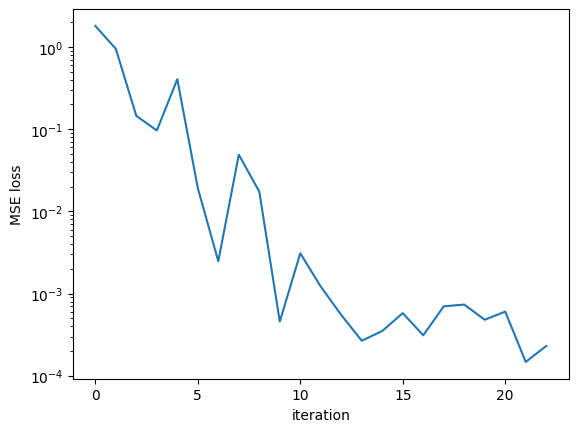

In [305]:
plt.semilogy(cost_history["cost"])
plt.xlabel("iteration")
plt.ylabel("MSE loss")

In [306]:
learned_phase = cost_history["prev_vector"][-1]

learned_phase

7.015861871107029

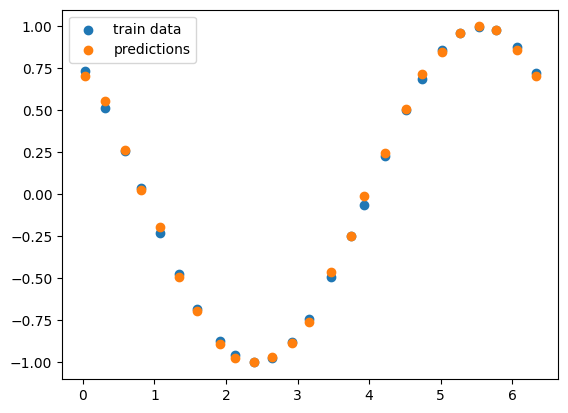

In [308]:
theta = learned_phase
parameter_values = [[x, theta] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

### Case 2

In [424]:
def true_model(x):
  true_freq = 0.37
  return np.cos(true_freq * x)

In [425]:
x_train = np.linspace(0, 2*np.pi, 25) + 0.1 * np.random.rand(25)
y_train = [true_model(x) for x in x_train]

Text(0, 0.5, '$y(x)$')

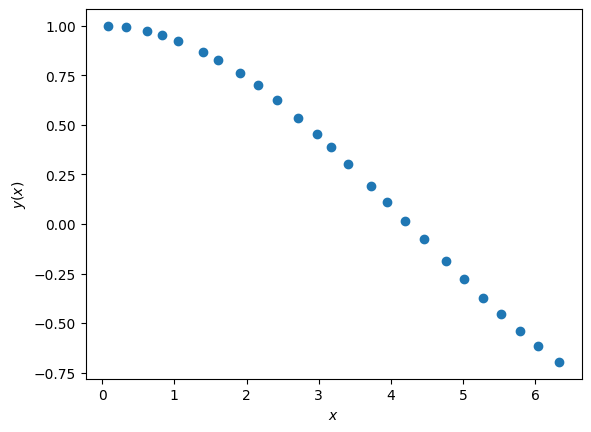

In [426]:
plt.scatter(x_train, y_train)
plt.xlabel(r"$x$")
plt.ylabel(r"$y(x)$")

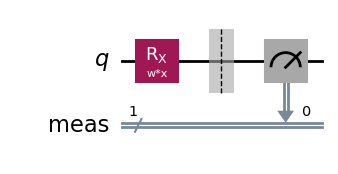

In [427]:
x = Parameter('x')
w = Parameter('w')

ansatz = QuantumCircuit(1)
ansatz.rx(x * w, 0)
ansatz.measure_all()

ansatz.draw("mpl")

In [428]:
ansatz.parameters

ParameterView([Parameter(w), Parameter(x)])

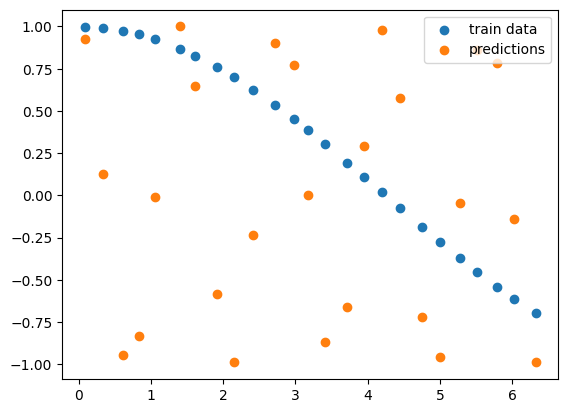

In [429]:
sampler = StatevectorSampler()
NSHOTS = 1024

w = 2*np.pi * np.random.rand()
parameter_values = [[w, x] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

def predictor(counts):
  return (counts.get('0', 0) - counts.get('1', 0))  / (counts.get('0', 0) + counts.get('1', 0))

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

In [430]:
cost_history = {
    "prev_value": None,
    "iters": 0,
    "cost": [],
}


def cost_func(params, ansatz):

    circuit_params = np.array([[params[0], x] for x in x_train]) # params is an array with a single value for w
    job = sampler.run([(ansatz, circuit_params)], shots = NSHOTS)
    global_counts = [data.get_counts() for data in job.result()[0].data.meas]
    y_pred = np.array([predictor(counts) for counts in global_counts])

    cost = np.mean((y_train - y_pred)**2)

    cost_history["iters"] += 1
    cost_history["prev_vector"] = params
    cost_history["cost"].append(cost)
    print(f"Iters. done: {cost_history['iters']} [Current cost: {cost}]")

    return cost

In [439]:
params_init = 2 * np.pi * np.random.random(1)

res = minimize(
      cost_func,
      params_init,
      args=(ansatz),
      method="cobyla",
      options = {"maxiter" : 300}
  )

Iters. done: 86 [Current cost: 0.8757065543614572]
Iters. done: 87 [Current cost: 0.8409186044310366]
Iters. done: 88 [Current cost: 0.8288899131129156]
Iters. done: 89 [Current cost: 0.9295581574635708]
Iters. done: 90 [Current cost: 0.8284485880617841]
Iters. done: 91 [Current cost: 0.9303839132885497]
Iters. done: 92 [Current cost: 0.7936954317871746]
Iters. done: 93 [Current cost: 0.8170780736718648]
Iters. done: 94 [Current cost: 0.8091604574579071]
Iters. done: 95 [Current cost: 0.8058992774137473]
Iters. done: 96 [Current cost: 0.8067817832560031]
Iters. done: 97 [Current cost: 0.7946613647375667]
Iters. done: 98 [Current cost: 0.8107006249898379]
Iters. done: 99 [Current cost: 0.8050906319291928]
Iters. done: 100 [Current cost: 0.8144922994024754]
Iters. done: 101 [Current cost: 0.8052289294473662]
Iters. done: 102 [Current cost: 0.7927222093312294]
Iters. done: 103 [Current cost: 0.7899348867185687]
Iters. done: 104 [Current cost: 0.7934016250226581]
Iters. done: 105 [Current 

In [440]:
learned_freq = cost_history["prev_vector"][-1]

learned_freq

8.632965816778086

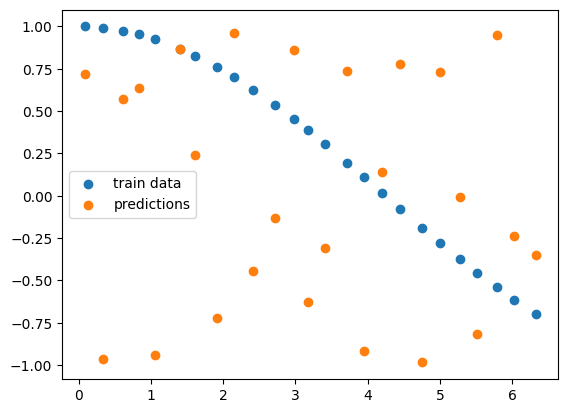

In [441]:
w = learned_freq
parameter_values = [[x, w] for x in x_train]

job = sampler.run([(ansatz, parameter_values)], shots = NSHOTS)
global_counts = [data.get_counts() for data in job.result()[0].data.meas]

y_pred = [predictor(counts) for counts in global_counts]

plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_train, y_pred, label = "predictions")
plt.legend()

Text(0, 0.5, 'cost function')

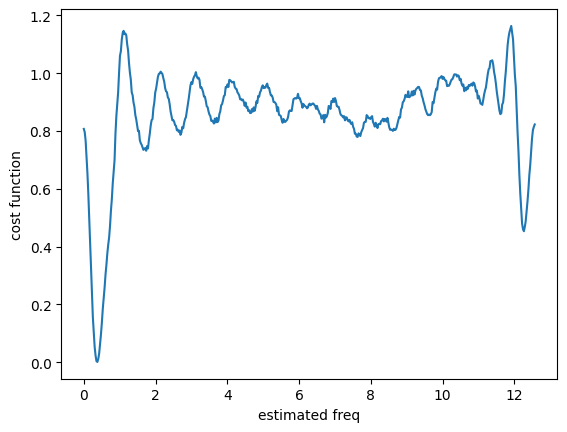

In [450]:
def model(params, ansatz):

    circuit_params = np.array([[params[0], x] for x in x_train]) # params is an array with a single value for w
    job = sampler.run([(ansatz, circuit_params)], shots = NSHOTS)
    global_counts = [data.get_counts() for data in job.result()[0].data.meas]
    y_pred = np.array([predictor(counts) for counts in global_counts])

    cost = np.mean((y_train - y_pred)**2)

    return cost

param_space = np.linspace(0, 4*np.pi, 250)
landscape = [model(np.array([param]), ansatz) for param in param_space]

plt.plot(param_space, landscape)
plt.xlabel("estimated freq")
plt.ylabel("cost function")

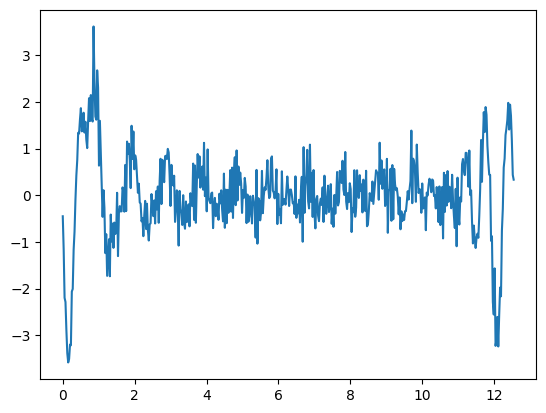

In [453]:
diffs = [(landscape[i+1] - landscape[i]) / (param_space[i+1] - param_space[i]) for i in range(len(param_space) - 1)]
plt.plot(param_space[:-1], diffs)

# Variational quantum eigensolver

In [457]:
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import StatevectorEstimator
from qiskit.quantum_info import SparsePauliOp


from scipy.linalg import eigh

### Measure energy

In [759]:
hamiltonian = SparsePauliOp.from_list(
    [("YZ", 0.45), ("ZI", -1.2), ("ZZ", 1.45) , ("XX", -0.99)]
)
hamiltonian.to_operator().draw("text")

[[ 0.25+0.j  , 0.  +0.j  , 0.  -0.45j,-0.99+0.j  ],
 [ 0.  +0.j  ,-2.65+0.j  ,-0.99+0.j  , 0.  +0.45j],
 [ 0.  +0.45j,-0.99+0.j  ,-0.25+0.j  , 0.  +0.j  ],
 [-0.99+0.j  , 0.  -0.45j, 0.  +0.j  , 2.65+0.j  ]]

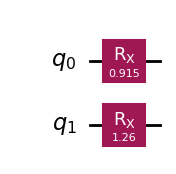

In [766]:
ansatz = QuantumCircuit(2)

phi1 = 2*np.pi*np.random.rand()
phi2 = 2*np.pi*np.random.rand()

ansatz.rx(phi1, 0)
ansatz.rx(phi2, 1)

ansatz.draw("mpl")

In [767]:
state = Statevector(ansatz)

In [769]:
H = hamiltonian.to_operator().data
psi = state.data

exp_value = psi.transpose().conjugate() @ H @ psi

exp_value

(-0.3570530100553031+0j)

In [779]:
sampler = StatevectorSampler()
NSHOTS = 10024

def exp_Z0(counts):
  num = counts.get('00', 0) + counts.get('10', 0) - counts.get('01', 0) - counts.get('11', 0)
  den = counts.get('00', 0) + counts.get('11', 0) + counts.get('01', 0) + counts.get('10', 0)
  return num / den

def exp_ZZ(counts):
  num = counts.get('00', 0) + counts.get('11', 0) - counts.get('01', 0) - counts.get('10', 0)
  den = counts.get('00', 0) + counts.get('11', 0) + counts.get('01', 0) + counts.get('10', 0)
  return num / den

energy = 0.0


# YZ term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.rx(-np.pi/2, 0)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[0] * exp_ZZ(counts)

# ZI term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[1] * exp_Z0(counts)

# ZZ term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[2] * exp_ZZ(counts)

# XX term
qc = QuantumCircuit(2)
qc.rx(phi1, 0)
qc.rx(phi2, 1)
qc.ry(np.pi/2, 0)
qc.ry(np.pi/2, 1)
qc.measure_all()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.meas.get_counts()
energy += hamiltonian.coeffs[3] * exp_ZZ(counts)


In [780]:
energy

(-0.3615183559457301+0j)

### Training loop

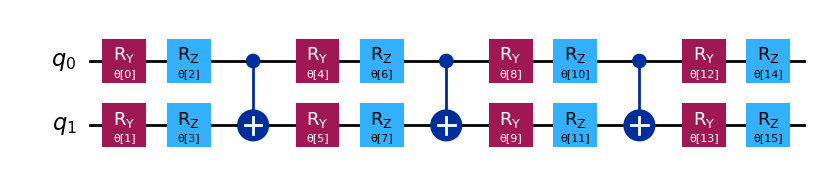

In [781]:
ansatz = EfficientSU2(hamiltonian.num_qubits)
ansatz.decompose().draw("mpl")

In [782]:
num_params = ansatz.num_parameters
print(f"{num_params = }")

num_params = 16


In [783]:
params_list = list(ansatz.parameters)
print(params_list)

[ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11]), ParameterVectorElement(θ[12]), ParameterVectorElement(θ[13]), ParameterVectorElement(θ[14]), ParameterVectorElement(θ[15])]


In [784]:
estimator = StatevectorEstimator()

init_params = 2 * np.pi * np.random.random(num_params)

job = estimator.run([(ansatz, [hamiltonian], init_params)])

result = job.result()[0]
ev = result.data.evs.item()
print(f"<state|H|state> = {ev:.4f}")

<state|H|state> = -0.2582


In [785]:
result = job.result()[0]
ev = result.data.evs.item()
print(f"<state|H|state> = {ev:.4f}")

<state|H|state> = -0.2582


In [786]:
cost_history = {
    "prev_vector": None,
    "iters": 0,
    "energy": [],
}

def cost_func(params, ansatz, hamiltonian, estimator):

    job = estimator.run([(ansatz, [hamiltonian], params)])
    result = job.result()[0]
    energy = result.data.evs.item()

    cost_history["iters"] += 1
    cost_history["prev_vector"] = params
    cost_history["energy"].append(energy)
    print(f"Iters. done: {cost_history['iters']} [Current cost: {energy}]")

    return energy

In [787]:
params_init = 2 * np.pi * np.random.random(num_params)

res = minimize(
      cost_func,
      params_init,
      args=(ansatz, hamiltonian, estimator),
      method="cobyla",
      options = {"maxiter" : 300}
  )

Iters. done: 1 [Current cost: 0.4406527933937125]
Iters. done: 2 [Current cost: -0.4926215697472782]
Iters. done: 3 [Current cost: -0.34933157165468853]
Iters. done: 4 [Current cost: 0.08047301805998608]
Iters. done: 5 [Current cost: 0.599162333564367]
Iters. done: 6 [Current cost: -0.25592728295442596]
Iters. done: 7 [Current cost: -0.5840209329956123]
Iters. done: 8 [Current cost: -0.5501125131726264]
Iters. done: 9 [Current cost: -0.07264758854848247]
Iters. done: 10 [Current cost: -1.2001391528812495]
Iters. done: 11 [Current cost: -1.2308300429921246]
Iters. done: 12 [Current cost: -0.8336172425568602]
Iters. done: 13 [Current cost: -0.3653833565269211]
Iters. done: 14 [Current cost: -1.3770393800668514]
Iters. done: 15 [Current cost: -0.7509787602671303]
Iters. done: 16 [Current cost: -1.49041639561088]
Iters. done: 17 [Current cost: -1.120727856827676]
Iters. done: 18 [Current cost: -1.1797131037741542]
Iters. done: 19 [Current cost: -1.3960960609539002]
Iters. done: 20 [Current

Text(0, 0.5, 'energy')

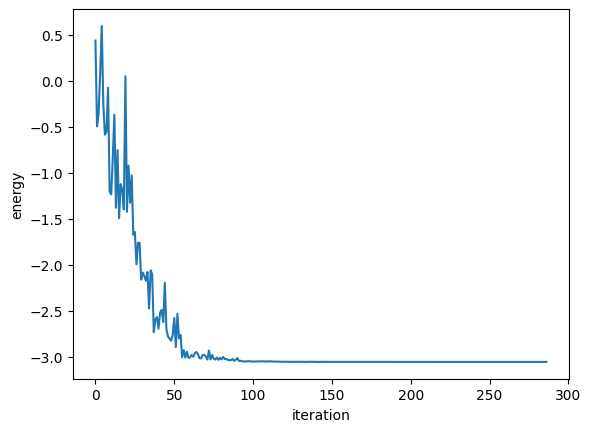

In [788]:
plt.plot(cost_history["energy"])
plt.xlabel("iteration")
plt.ylabel("energy")

In [789]:
values = cost_history["prev_vector"]
print(f"{values = }")

values = array([7.2486403 , 2.97818989, 5.10610273, 2.3096586 , 2.84501503,
       7.11107826, 2.40027103, 4.73400896, 5.77386504, 1.93292207,
       0.48600836, 1.65138232, 1.04151145, 5.3012603 , 4.76151866,
       3.37517782])


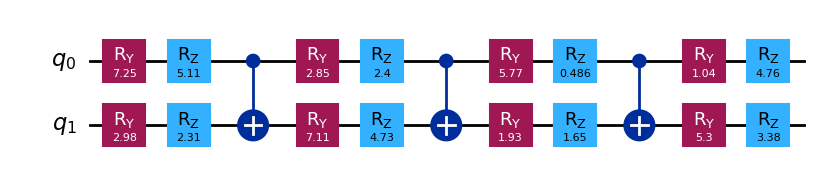

In [790]:
vqe_circuit = ansatz.assign_parameters(values)
vqe_circuit.decompose().draw("mpl")

In [791]:
vqe_ground_state = Statevector(vqe_circuit)

In [792]:
vqe_ground_energy = cost_history["energy"][-1]

In [793]:
print("VQE-estimated ground state:")
display(vqe_ground_state.draw("latex"))
print("VQE-estimated ground energy:")
print(vqe_ground_energy)

VQE-estimated ground state:


<IPython.core.display.Latex object>

VQE-estimated ground energy:
-3.053469864259903


In [794]:
matrix = hamiltonian.to_matrix()
exact_ground_energy, exact_ground_state = eigh(matrix, subset_by_index = [0, 0])

In [795]:
print("Exact ground state:")
display(Statevector(exact_ground_state).draw("latex"))
print("Exact ground energy:")
print(exact_ground_energy)

Exact ground state:


<IPython.core.display.Latex object>

Exact ground energy:
[-3.05346987]


In [796]:
for (vqe_amplitude, exact_amplitude) in zip(vqe_ground_state.data, exact_ground_state):
  phase = vqe_amplitude / exact_amplitude
  print(f"phase = {phase.item():.4f}")

phase = 0.1902-0.9817j
phase = 0.1898-0.9818j
phase = 0.1897-0.9818j
phase = 0.1900-0.9817j


# My first quantum algorithm

In [ ]:
def bv_function(s):
    """
    Create a Bernstein-Vazirani function from a string of 1s and 0s.
    """
    qc = QuantumCircuit(QuantumRegister(len(s), 'input'), QuantumRegister(1, 'output'))
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

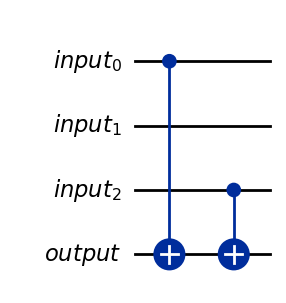

In [ ]:
hidden_bitstring = "101"

function = bv_function("101")
function.draw("mpl")

In [ ]:
def bv_algo(function: QuantumCircuit):
    """
    Compiles a circuit for use in the Deutsch-Jozsa/Bernstein-Vazirani algorithm.
    """
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.barrier()
    qc.h(range(n + 1))
    qc.barrier()
    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()
    qc.barrier()
    qc.h(range(n))
    qc.barrier()
    qc.measure(range(n), range(n))
    return qc

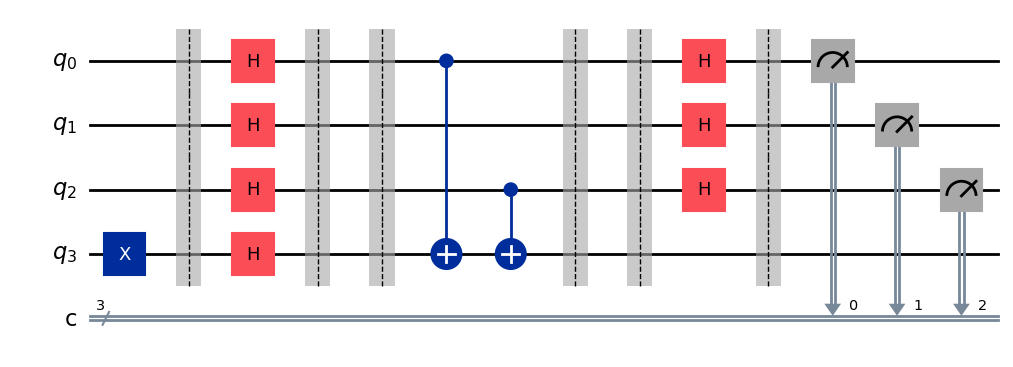

In [ ]:
qc = bv_algo(function)
qc.draw("mpl")

In [ ]:
NSHOTS = 1028
sampler = StatevectorSampler()
job = sampler.run([qc], shots=NSHOTS)
results = job.result()[0]
counts = results.data.c.get_counts()

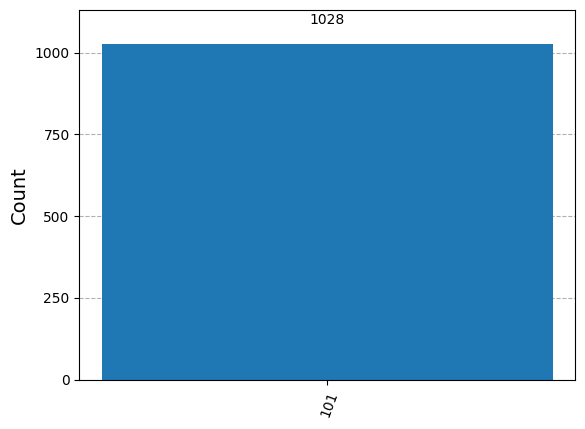

In [ ]:
plot_histogram(counts)